In [74]:
from data import Dataset
from sc_ged import SC_GED
from utils import modularity

import matplotlib.pyplot as plt


%reload_ext autoreload
%autoreload 2

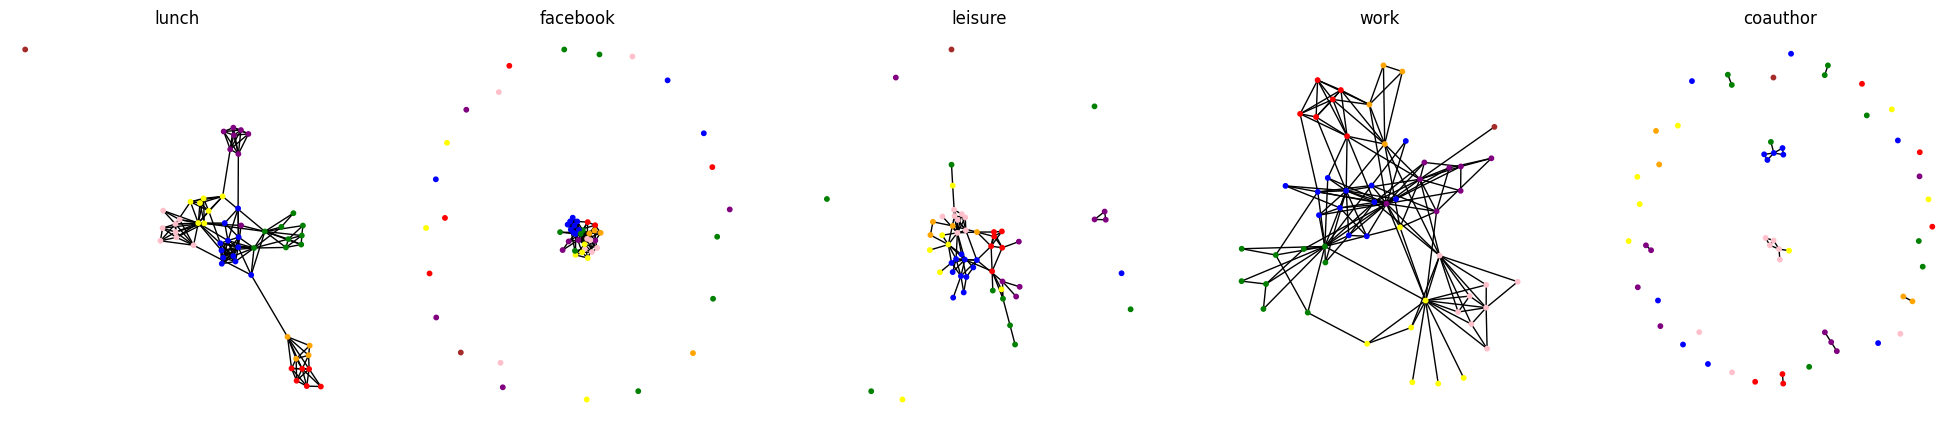

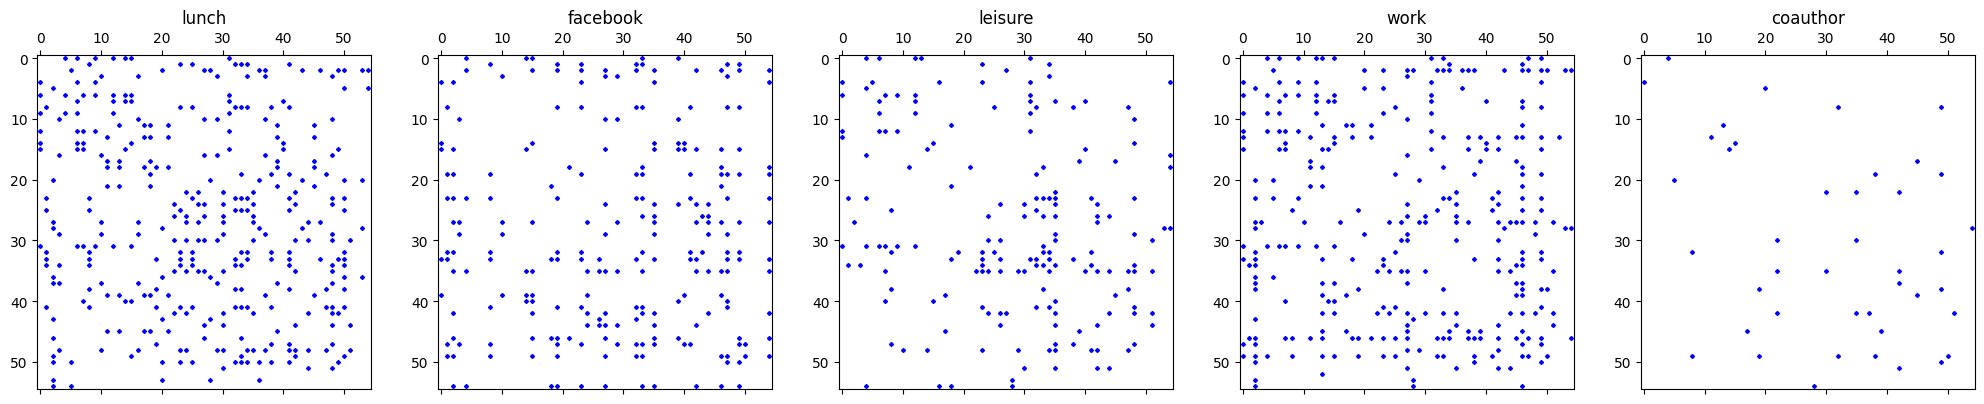

In [124]:
dataset = Dataset("AUCS", preprocess=False)
dataset.display()

In [150]:
M = len(dataset.MLG)
for i in range(M):
    print(i)
    k = np.unique(dataset.labels).shape[0]
    model = SC_GED(dataset.MLG, k=k, most_informative=i, alpha=0.5, beta=200)
    model.fit(n_iter=0)

    purity, nmi, ri = model.evaluate(dataset.labels, verbose=True)

0


Joint Eigen Decomposition: 0it [00:00, ?it/s]


norm of P: 7.416197776794434
norm of Q: 7.41619873046875
norm of P @ Q - I: 2.7191599656362087e-06
Purity:  0.9090909090909091
NMI:  0.8538157576471314
RI:  0.936026936026936
1


Joint Eigen Decomposition: 0it [00:00, ?it/s]


norm of P: 7.41619873046875
norm of Q: 7.416199207305908
norm of P @ Q - I: 1.8404091406409862e-06
Purity:  0.509090909090909
NMI:  0.4218024134932357
RI:  0.6868686868686869
2


Joint Eigen Decomposition: 0it [00:00, ?it/s]


norm of P: 7.416198253631592
norm of Q: 7.41619873046875
norm of P @ Q - I: 1.9314816199766938e-06
Purity:  0.5818181818181818
NMI:  0.5864119128219084
RI:  0.7535353535353535
3


Joint Eigen Decomposition: 0it [00:00, ?it/s]


norm of P: 7.41619873046875
norm of Q: 7.416198253631592
norm of P @ Q - I: 2.922585281339707e-06
Purity:  0.7636363636363637
NMI:  0.7286973854506154
RI:  0.8558922558922559
4


Joint Eigen Decomposition: 0it [00:00, ?it/s]


norm of P: 7.41619873046875
norm of Q: 7.416198253631592
norm of P @ Q - I: 9.69692223407037e-07
Purity:  0.5454545454545454
NMI:  0.44313071158404904
RI:  0.5771043771043771


In [153]:
M = len(dataset.MLG)
for i in range(M):
    print(i)
    k = np.unique(dataset.labels).shape[0]
    model = SC_GED(dataset.MLG, k=k, most_informative=i, alpha=0.5, beta=10)
    model.fit(n_iter=100)

    purity, nmi, ri = model.evaluate(dataset.labels, verbose=True)

0


Joint Eigen Decomposition: 100%|██████████| 100/100 [00:04<00:00, 21.50it/s]


norm of P: 7.382187843322754
norm of Q: 7.494726181030273
norm of P @ Q - I: 0.9429135322570801
Purity:  0.9454545454545454
NMI:  0.9063763233114484
RI:  0.9649831649831649
1


Joint Eigen Decomposition: 100%|██████████| 100/100 [00:04<00:00, 20.93it/s]


norm of P: 7.320651531219482
norm of Q: 7.556737422943115
norm of P @ Q - I: 1.0094724893569946
Purity:  0.7818181818181819
NMI:  0.7684612703113696
RI:  0.8861952861952862
2


Joint Eigen Decomposition: 100%|██████████| 100/100 [00:03<00:00, 26.96it/s]


norm of P: 7.325324535369873
norm of Q: 7.497093677520752
norm of P @ Q - I: 0.7229801416397095
Purity:  0.7636363636363637
NMI:  0.77019317160256
RI:  0.9037037037037037
3


Joint Eigen Decomposition: 100%|██████████| 100/100 [00:04<00:00, 20.93it/s]


norm of P: 7.382137775421143
norm of Q: 7.522314071655273
norm of P @ Q - I: 0.749299168586731
Purity:  0.7818181818181819
NMI:  0.7866108518148492
RI:  0.8976430976430977
4


Joint Eigen Decomposition: 100%|██████████| 100/100 [00:01<00:00, 50.31it/s]


norm of P: 7.260786533355713
norm of Q: 7.45013427734375
norm of P @ Q - I: 1.0622520446777344
Purity:  0.4727272727272727
NMI:  0.3994828050220683
RI:  0.5656565656565656


In [133]:
len(model.clustering)

55

In [123]:
model = SC_GED(dataset.MLG, k=9, most_informative=1, alpha=0.5, beta=200)
model.fit(n_iter=0)

purity, nmi, ri = model.evaluate(dataset.labels, verbose=True)

Joint Eigen Decomposition: 0it [00:00, ?it/s]


norm of P: 9.486832618713379
norm of Q: 9.486831665039062
norm of P @ Q - I: 1.9033923308597878e-06
Purity:  0.5
NMI:  0.20435805119619307
RI:  0.4369538077403246


In [121]:
model = SC_GED(dataset.MLG, k=9, most_informative=2, alpha=0.5, beta=200)
model.fit(n_iter=100)

purity, nmi, ri = model.evaluate(dataset.labels, verbose=True)

Joint Eigen Decomposition: 100%|██████████| 100/100 [00:18<00:00,  5.37it/s]


norm of P: 19.646041870117188
norm of Q: 20.67273712158203
norm of P @ Q - I: 7.539652347564697
Purity:  0.5
NMI:  0.23537369262240865
RI:  0.6529338327091136


In [ ]:
#  confusion matrix 
from sklearn.metrics import confusion_matrix

ordered = sorted(clustering)

cm = confusion_matrix(y_pred, model.labels)

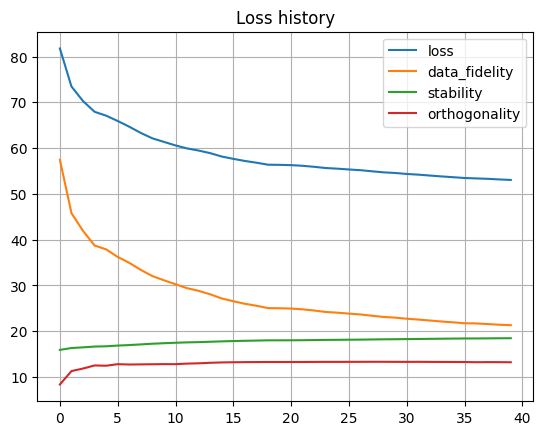

In [102]:
model.plot_loss()

In [93]:
for layer, G in zip(dataset.layer_labels, dataset.MLG):
    m = modularity(G, clustering)
    print(f"Modularity of layer based on clustering {layer}: {m:.4f}")

Modularity of layer based on clustering authors: 0.0183
Modularity of layer based on clustering titles: 0.0041
Modularity of layer based on clustering citations: 0.0710


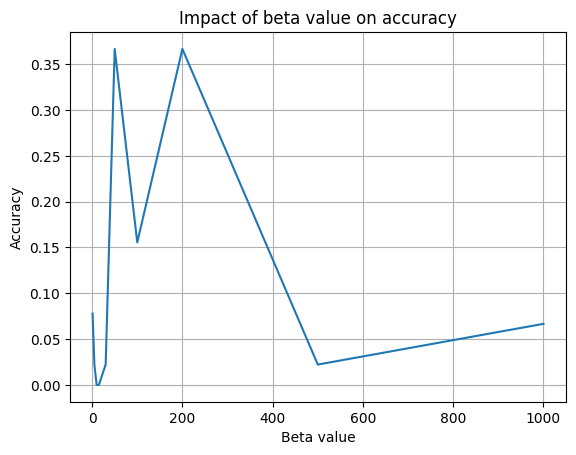

In [ ]:
plt.plot(betas, ri, label="RI")
plt.plot(betas, nmi, label="NMI")
plt.plot(betas, purity, label="Purity")
plt.xlabel("Beta value")
plt.ylabel("Accuracy")
plt.title("Impact of beta value on accuracy")
plt.grid()
plt.show()

In [ ]:
accuracy = []
alphas = [0, 0.1, 0.5, 1, 3, 5, 7, 10]
for alpha in alphas:
    print(f"Alpha = {alpha}")
    model = SC_GED(dataset.MLG, k=7, most_informative=0, alpha=alpha, beta=200)
    model.fit(n_iter=200)
    clustering, accuracy_value = model.evaluate(dataset.labels)
    accuracy.append(accuracy_value)

Alpha = 0


Joint Eigen Decomposition:   2%|▏         | 4/200 [00:00<00:05, 33.02it/s]

Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 13.31it/s]


Alpha = 0.1


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 13.08it/s]


Alpha = 0.5


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:15<00:00, 13.16it/s]


Alpha = 1


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:13<00:00, 14.56it/s]


Alpha = 3


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:17<00:00, 11.26it/s]


Alpha = 5


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:18<00:00, 10.85it/s]


Alpha = 7


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:16<00:00, 11.98it/s]


Alpha = 10


Joint Eigen Decomposition: 100%|██████████| 200/200 [00:20<00:00,  9.88it/s]


Results:
* requires manually choosing beta and alpha for each specific case which is not always ideal when we don't have the real labels: very sensitive to alpha and beta values
* Requires a lot of comupations to find the eigenvalues of all layers and eigenvectors of the most informative layer: not suited for high dimentional datasets
* Modularity is high for coauthor layer as we put it as the most informative but also because members of the same group would more likely co-author together. Then there's the lunch and leisure which makes sense because if you work together you will more likely have outside activities together or eat together at lunch. The work was expected to be higher but maybe lunch groups can include different people from the group but not necessarily directly work together during working hours. Finally, the facebook has the lowest modularity as people from different working groups can be friends on social media with anyone from work. 
* A low alpha has no impact in this case on the stability of of P and Q. Maybe it's already inforced implicitly in the data fidelity term. Higher alpha values degrade the results.  

Ideas to implement:
* See how the data_fidelity, sparsity, orthogonality terms evolve over iterations (Normalize maybe and see the difference in scale to find the best beta and alpha)

* Evaluate the impact of different alpha and beta values to conclude the sensitivity of the model to hyperparams

* Implement more evaluation metrics like the ones in the paper

* Test this on a big graph dataset to conclude that it's not suitable for big datasets

* Show how the first eigen vectors can be mapped to 1D dimension 

* Maybe find more datasets with labels this time

